In [12]:
import requests
from dotenv import load_dotenv
import os 
import pandas as pd
import numpy as np
import alpaca_trade_api as tradeapi
# from MCForecastTools import MCSimulation
import json

import matplotlib.pyplot as plt

In [13]:
load_dotenv()

True

In [14]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
# YOUR CODE HERE!
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version= "v2")

In [15]:
print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpca Secret Key type: {type(alpaca_secret_key)}")

Alpaca Key type: <class 'str'>
Alpca Secret Key type: <class 'str'>


In [16]:
current_date = pd.Timestamp("2020-01-05", tz="America/New_York").isoformat()

tickers = ["SPY", "AAPL", "TSLA", "GE", "F", "MSFT","NIO", "PFE", "AMZN","AAL","DIS","PLUG"]


timeframe = "1D"

In [17]:
df_ticker = alpaca.get_barset(
    tickers,
    timeframe,
    start=current_date
).df

df_ticker

AAL                                      AAPL  \
                             open     high    low   close    volume    open   
2020-01-06 00:00:00-05:00  27.190  27.4901  27.08  27.320   5383583  293.79   
2020-01-07 00:00:00-05:00  27.560  27.6800  27.06  27.220   5472322  299.84   
2020-01-08 00:00:00-05:00  27.100  28.0900  27.07  27.840   9704511  297.16   
2020-01-09 00:00:00-05:00  28.090  28.2300  27.71  27.950   6198374  307.25   
2020-01-10 00:00:00-05:00  27.930  27.9900  27.25  27.320   7356133  310.60   
...                           ...      ...    ...     ...       ...     ...   
2021-01-06 00:00:00-05:00  15.450  15.8000  15.17  15.520  61348418  127.72   
2021-01-07 00:00:00-05:00  15.670  15.8700  15.38  15.380  45503976  128.36   
2021-01-08 00:00:00-05:00  15.430  15.5300  15.00  15.115  54302647  132.43   
2021-01-11 00:00:00-05:00  14.820  15.0400  14.71  15.005  38241743  129.19   
2021-01-12 00:00:00-05:00  15.075  15.4300  14.88  15.370  44835719  128.50   

                                                                   ...  \
                               high      low     close     volume  ...   
2020-01-06 00:00:00-05:00  299.9600  292.750  299.7800   27487207  ...   
2020-01-07 00:00:00-05:00  300.9000  297.480  298.2700   23877417  ...   
2020-01-08 00:00:00-05:00  304.4399  297.156  303.1500   29547763  ...   
2020-01-09 00:00:00-05:00  310.4300  306.200  309.7100   39240341  ...   
2020-01-10 00:00:00-05:00  312.6700  308.250  310.3700   32981826  ...   
...                             ...      ...       ...        ...  ...   
2021-01-06 00:00:00-05:00  131.0499  126.382  126.5800  142064548  ...   
2021-01-07 00:00:00-05:00  131.6300  127.860  130.8500   95314687  ...   
2021-01-08 00:00:00-05:00  132.6300  130.230  131.9900   93211863  ...   
2021-01-11 00:00:00-05:00  130.1700  128.500  128.9800   84845947  ...   
2021-01-12 00:00:00-05:00  129.6900  126.860  128.8199   83381829  ...   

                                SPY                                      \
                               open    high       low   close    volume   
2020-01-06 00:00:00-05:00  320.4900  323.73  320.3600  323.67  43105385   
2020-01-07 00:00:00-05:00  323.0200  323.54  322.2400  322.76  33909984   
2020-01-08 00:00:00-05:00  322.9400  325.78  322.6700  324.42  56581814   
2020-01-09 00:00:00-05:00  326.1600  326.73  325.5200  326.62  43365068   
2020-01-10 00:00:00-05:00  327.2899  327.46  325.2000  325.70  44989039   
...                             ...     ...       ...     ...       ...   
2021-01-06 00:00:00-05:00  369.7100  376.98  369.1200  373.53  91989131   
2021-01-07 00:00:00-05:00  376.1000  379.90  375.9100  379.06  58862006   
2021-01-08 00:00:00-05:00  380.5900  381.49  377.1000  381.24  60275466   
2021-01-11 00:00:00-05:00  377.8500  380.58  377.7189  378.74  44814805   
2021-01-12 00:00:00-05:00  378.8900  379.86  376.3600  378.81  45364896   

                             TSLA                                        
                             open    high       low     close    volume  
2020-01-06 00:00:00-05:00  440.47  451.56  440.0000  451.4001   9807049  
2020-01-07 00:00:00-05:00  461.40  471.63  453.3550  469.1700  16859537  
2020-01-08 00:00:00-05:00  473.70  498.49  468.2300  492.0900  29804104  
2020-01-09 00:00:00-05:00  497.10  498.80  472.8700  481.4900  26901507  
2020-01-10 00:00:00-05:00  481.79  484.94  473.7000  477.9600  12365563  
...                           ...     ...       ...       ...       ...  
2021-01-06 00:00:00-05:00  758.49  774.00  749.1000  756.4600  41989335  
2021-01-07 00:00:00-05:00  777.63  816.99  775.2000  816.2400  48080256  
2021-01-08 00:00:00-05:00  856.00  884.49  838.3900  880.0300  71814487  
2021-01-11 00:00:00-05:00  849.40  854.43  803.6222  811.1800  55755718  
2021-01-12 00:00:00-05:00  831.00  868.00  827.3400  849.2200  43550554  

[258 rows x 60 columns]

In [33]:
df_closing_prices = pd.DataFrame()

for ticker in tickers:
    df_closing_prices[ticker] = df_ticker[ticker]['close']
# Preview DataFrame
# YOUR CODE HERE!
df_closing_prices

,SPY,AAPL,TSLA,GE,F,MSFT,NIO,PFE,AMZN,AAL,DIS,PLUG
2020-01-06 00:00:00-05:00,323.67,299.7800,451.4001,12.140,9.1500,159.02,3.6900,38.870,1903.33,27.320,145.65,3.8150
2020-01-07 00:00:00-05:00,322.76,298.2700,469.1700,12.055,9.2500,157.60,3.2500,38.760,1906.86,27.220,145.68,3.8050
2020-01-08 00:00:00-05:00,324.42,303.1500,492.0900,11.930,9.2500,160.14,3.3850,39.050,1892.09,27.840,145.45,4.0675
2020-01-09 00:00:00-05:00,326.62,309.7100,481.4900,11.900,9.2750,162.09,3.4700,38.890,1901.00,27.950,144.80,4.0450
2020-01-10 00:00:00-05:00,325.70,310.3700,477.9600,11.670,9.2500,161.32,3.5100,39.490,1882.98,27.320,144.60,4.1400
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-06 00:00:00-05:00,373.53,126.5800,756.4600,11.360,8.8422,212.22,50.5234,36.880,3138.01,15.520,179.12,35.0000
2021-01-07 00:00:00-05:00,379.06,130.8500,816.2400,11.280,9.0500,218.29,54.2500,37.050,3161.41,15.380,178.58,47.3000
2021-01-08 00:00:00-05:00,381.24,131.9900,880.0300,11.340,9.0000,219.55,58.9100,37.120,3182.70,15.115,178.68,53.7788
2021-01-11 00:00:00-05:00,378.74,128.9800,811.1800,11.455,9.3000,217.50,62.7250,37.770,3115.75,15.005,179.12,53.9700


In [34]:
df_closing_prices.index = df_closing_prices.index.date

In [218]:
df_closing_prices

,SPY,AAPL,TSLA,GE,F,MSFT,NIO,PFE,AMZN,AAL,DIS,PLUG
2020-01-06,323.67,299.78,451.4001,12.140,9.1500,159.02,3.6900,38.87,1903.33,27.320,145.65,3.8150
2020-01-07,322.76,298.27,469.1700,12.055,9.2500,157.60,3.2500,38.76,1906.86,27.220,145.68,3.8050
2020-01-08,324.42,303.15,492.0900,11.930,9.2500,160.14,3.3850,39.05,1892.09,27.840,145.45,4.0675
2020-01-09,326.62,309.71,481.4900,11.900,9.2750,162.09,3.4700,38.89,1901.00,27.950,144.80,4.0450
2020-01-10,325.70,310.37,477.9600,11.670,9.2500,161.32,3.5100,39.49,1882.98,27.320,144.60,4.1400
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31,373.85,132.58,705.2100,10.790,8.7900,222.37,48.7400,36.79,3256.41,15.755,181.10,33.9200
2021-01-04,368.85,129.41,729.7500,10.470,8.5200,217.81,53.4816,36.82,3186.65,15.120,177.55,32.1800
2021-01-05,371.32,130.95,735.0550,10.765,8.6450,218.01,53.2000,37.19,3218.51,15.430,178.45,32.5500
2021-01-06,373.53,126.58,756.4600,11.360,8.8422,212.22,50.5234,36.88,3138.01,15.520,179.12,35.0000


In [219]:
df_closing_prices.std()

SPY      32.398954
AAPL    114.414721
TSLA    415.009105
GE        2.214133
F         1.433351
MSFT     22.888818
NIO      15.837443
PFE       2.374937
AMZN    541.849399
AAL       5.556015
DIS      20.035405
PLUG      8.846616
dtype: float64

In [220]:
df_current_price = df_closing_prices.tail(1)
df_current_price

,SPY,AAPL,TSLA,GE,F,MSFT,NIO,PFE,AMZN,AAL,DIS,PLUG
2021-01-07,379.06,130.85,816.24,11.28,9.05,218.29,54.25,37.05,3161.41,15.38,178.58,47.3


In [246]:
price_change_df = df_closing_prices.pct_change()
daily_price_change = price_change_df.dropna()

In [247]:
daily_prices_std = daily_price_change.std()
daily_prices_std

SPY     0.021548
AAPL    0.055251
TSLA    0.074302
GE      0.039616
F       0.035333
MSFT    0.027843
NIO     0.064593
PFE     0.022658
AMZN    0.024473
AAL     0.065223
DIS     0.030775
PLUG    0.064665
dtype: float64

In [249]:
annual_std = daily_prices_std * np.sqrt(252)
annual_std

SPY     0.342067
AAPL    0.877084
TSLA    1.179509
GE      0.628887
F       0.560900
MSFT    0.441990
NIO     1.025374
PFE     0.359690
AMZN    0.388489
AAL     1.035390
DIS     0.488538
PLUG    1.026531
dtype: float64

In [250]:
SPY_df = daily_price_change["SPY"]
spy500_return = SPY_df.mean() * 252
spy500_return

0.21560070376335067

In [268]:
standard_df = pd.DataFrame(annual_std, columns=["StandardDev"])
standard_df

,StandardDev
SPY,0.342067
AAPL,0.877084
TSLA,1.179509
GE,0.628887
F,0.560900
MSFT,0.441990
NIO,1.025374
PFE,0.359690
AMZN,0.388489
AAL,1.035390


<AxesSubplot:>

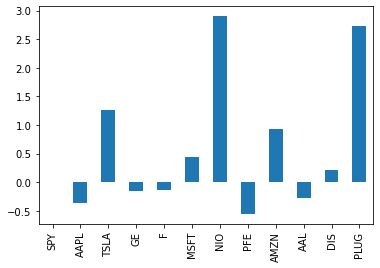

In [269]:
def sharpe_ratio(return_series, N, rf):
    mean = return_series.mean() * N -rf
    sigma = return_series.std() * np.sqrt(N)
    return mean / sigma

N = 252 #252 trading days in a year
rf = spy500_return #1% risk free rate
sharpe_ratio = daily_price_change.apply(sharpe_ratio, args=(N,rf,),axis=0)

sharpe_ratio.plot.bar()

Excess return is the return on the portfolio less risk-free rate.

Therefore, excess return is negative when the (realized or expected) return on the portfolio (or fund, trading strategy, or investment) is lower than the risk-free interest rate (typically a money market rate or treasury yield).

Sharpe ratio is negative when the investment return is lower than the risk-free rate.

In [270]:
sharpe_ratio_df = pd.DataFrame(sharpe_ratio, columns=["SharpeRatio"])
sharpe_ratio_df

,SharpeRatio
SPY,0.000000
AAPL,-0.365816
TSLA,1.256237
GE,-0.145128
F,-0.128990
MSFT,0.444342
NIO,2.898849
PFE,-0.552451
AMZN,0.935211
AAL,-0.264991


In [271]:
sharpe_and_std = pd.concat([standard_df, sharpe_ratio_df], axis=1) 
sharpe_and_std

,StandardDev,SharpeRatio
SPY,0.342067,0.000000
AAPL,0.877084,-0.365816
TSLA,1.179509,1.256237
GE,0.628887,-0.145128
F,0.560900,-0.128990
MSFT,0.441990,0.444342
NIO,1.025374,2.898849
PFE,0.359690,-0.552451
AMZN,0.388489,0.935211
AAL,1.035390,-0.264991


In [275]:
covariance = df_closing_prices.cov()
variance = df_closing_prices.var()
beta = covariance/variance
mrkt_beta = beta["SPY"]
beta

,SPY,AAPL,TSLA,GE,F,MSFT,NIO,PFE,AMZN,AAL,DIS,PLUG
SPY,1.000000,-0.099573,0.003065,5.828253,19.133938,1.153829,1.568512,8.654789,0.041944,1.321813,1.409946,2.824815
AAPL,-1.241772,1.000000,0.225626,-6.722905,-26.726636,-1.366942,-4.706074,-1.835116,-0.064402,2.676429,-1.980940,-7.752607
TSLA,0.502856,2.968524,1.000000,-45.681496,-47.138478,4.392031,-5.191866,18.328712,0.180092,-9.648264,-1.789693,-6.343651
GE,0.027220,-0.002518,-0.001300,1.000000,1.155706,-0.013631,0.030400,0.291627,-0.001321,0.340674,0.073336,0.055240
F,0.037450,-0.004195,-0.000562,0.484334,1.000000,0.026346,0.056017,0.352268,0.000754,0.153387,0.063202,0.096504
MSFT,0.575872,-0.054706,0.013360,-1.456720,6.718265,1.000000,1.051184,3.815553,0.040618,-1.222411,0.604636,1.893312
NIO,0.374797,-0.090171,-0.007561,1.555402,6.838848,0.503272,1.000000,2.127473,0.020809,-0.488015,0.553231,1.722361
PFE,0.046505,-0.000791,0.000600,0.335525,0.967100,0.041079,0.047841,1.000000,0.001324,0.104089,0.067237,0.083946
AMZN,11.731943,-1.444413,0.306999,-79.137332,107.816934,22.763113,24.358072,68.916282,1.000000,-45.677073,10.722836,43.571147
AAL,0.038872,0.006311,-0.001729,2.145151,2.304674,-0.072027,-0.060061,0.569677,-0.004803,1.000000,0.124239,-0.094934


In [276]:
alpha= np.mean(df_closing_prices)-beta*np.mean(df_closing_prices)
alpha.round(decimals=6)


,SPY,AAPL,TSLA,GE,F,MSFT,NIO,PFE,AMZN,AAL,DIS,PLUG
SPY,0.000000,283.197964,786.444700,-39.804047,-127.950299,-29.790410,-9.301843,-279.999982,2581.378760,-4.883349,-52.080970,-20.329940
AAPL,721.909632,0.000000,610.874479,63.667516,195.634912,458.379757,93.361228,103.704036,2867.917515,-25.438940,378.709186,97.511223
TSLA,160.093442,-506.998837,0.000000,384.841556,339.657760,-656.897550,101.309628,-633.856710,2209.154063,161.581863,354.412465,81.814294
GE,313.260866,258.201192,789.888072,-0.000000,-1.098638,196.298901,15.864323,25.911151,2697.954025,10.004933,117.726700,10.525402
F,309.966566,258.633075,789.305915,4.251140,0.000000,188.556925,15.445196,23.693019,2692.360868,12.846914,119.014185,10.065682
MSFT,136.580263,271.642371,778.323373,20.253161,-40.347204,-0.000000,-0.837466,-102.988465,2584.952123,33.723927,50.228490,-9.952228
NIO,201.331834,280.776450,794.826917,-4.578723,-41.198024,96.195980,0.000000,-41.241153,2638.325435,22.579855,56.759143,-8.047699
PFE,307.050539,257.756399,788.388838,5.477924,0.232135,185.703848,15.578970,-0.000000,2690.826456,13.594978,118.501493,10.205596
AMZN,-3455.968166,629.565381,546.682292,660.650969,-753.683989,-4214.624491,-382.178403,-2484.269497,-0.000000,708.300256,-1235.223539,-474.277488
AAL,309.508587,255.927264,790.226490,-9.440608,-9.205579,207.607824,17.344423,15.740526,2707.333515,-0.000000,111.259833,12.198465


In [277]:
variance

SPY       1049.692216
AAPL     13090.728487
TSLA    172232.557330
GE           4.902386
F            2.054496
MSFT       523.897982
NIO        250.824612
PFE          5.640325
AMZN    293600.771246
AAL         30.869300
DIS        401.417462
PLUG        78.262622
dtype: float64

In [278]:
dataframe_beta = pd.DataFrame(beta.loc["SPY"])
dataframe_beta.columns = ["Beta"]

In [279]:
sharpe_std_beta = pd.concat([sharpe_and_std, dataframe_beta], axis=1) 
sharpe_std_beta.drop(["SPY"])
df_sharpe_std_beta = sharpe_std_beta.drop(["SPY"])
df_sharpe_std_beta

,StandardDev,SharpeRatio,Beta
AAPL,0.877084,-0.365816,-0.099573
TSLA,1.179509,1.256237,0.003065
GE,0.628887,-0.145128,5.828253
F,0.560900,-0.128990,19.133938
MSFT,0.441990,0.444342,1.153829
NIO,1.025374,2.898849,1.568512
PFE,0.359690,-0.552451,8.654789
AMZN,0.388489,0.935211,0.041944
AAL,1.035390,-0.264991,1.321813
DIS,0.488538,0.213758,1.409946


## R squared vs Beta

R-squared measures how closely each change in the price of an asset is correlated to a benchmark. Beta measures how large those price changes are in relation to a benchmark. Used together, R-squared and beta give investors a thorough picture of the performance of asset managers.

In [285]:
df_sharpe_std_beta

,StandardDev,SharpeRatio,Beta
AAPL,0.877084,-0.365816,-0.099573
TSLA,1.179509,1.256237,0.003065
GE,0.628887,-0.145128,5.828253
F,0.560900,-0.128990,19.133938
MSFT,0.441990,0.444342,1.153829
NIO,1.025374,2.898849,1.568512
PFE,0.359690,-0.552451,8.654789
AMZN,0.388489,0.935211,0.041944
AAL,1.035390,-0.264991,1.321813
DIS,0.488538,0.213758,1.409946


In [20]:
def get_data(ticker):
    df = alpaca.get_barset(
        ticker,
        timeframe,
        start = current_date
    ).df

    return df

In [21]:
def get_columns(dataframe):
    dataframe = dataframe.T.reset_index(drop = True).T
    dataframe = dataframe.rename(columns={3:"close", 4:"volume"})
    dataframe = dataframe.loc[:,["close", "volume"]]

    return dataframe

In [22]:
def calc_daily_returns(dataframe):
    dataframe["pct_change"] = dataframe["close"].pct_change()
    dataframe["volatility"] = np.std(dataframe["pct_change"])

    return dataframe

In [24]:
df_appl = get_data("AAPL")
df_appl = get_columns(df_appl)
df_appl = calc_daily_returns(df_appl)
df_appl

,close,volume,pct_change,volatility
2020-01-06 00:00:00-05:00,299.7800,27487207.0,NaN,0.05484
2020-01-07 00:00:00-05:00,298.2700,23877417.0,-0.005037,0.05484
2020-01-08 00:00:00-05:00,303.1500,29547763.0,0.016361,0.05484
2020-01-09 00:00:00-05:00,309.7100,39240341.0,0.021639,0.05484
2020-01-10 00:00:00-05:00,310.3700,32981826.0,0.002131,0.05484
...,...,...,...,...
2021-01-06 00:00:00-05:00,126.5800,142064548.0,-0.033372,0.05484
2021-01-07 00:00:00-05:00,130.8500,95314687.0,0.033734,0.05484
2021-01-08 00:00:00-05:00,131.9900,93211863.0,0.008712,0.05484
2021-01-11 00:00:00-05:00,128.9800,84845947.0,-0.022805,0.05484


In [30]:
df_spy = get_data("SPY")
df_spy = get_columns(df_spy)
df_spy = calc_daily_returns(df_spy)
df_spy

df_tsla = get_data("TSLA")
df_tsla = get_columns(df_tsla)
df_tsla = calc_daily_returns(df_tsla)
df_tsla

df_ge = get_data("GE")
df_ge = get_columns(df_ge)
df_ge = calc_daily_returns(df_ge)
df_ge

df_f = get_data("F")
df_f = get_columns(df_f)
df_f = calc_daily_returns(df_f)
df_f

df_msft = get_data("MSFT")
df_msft = get_columns(df_msft)
df_msft = calc_daily_returns(df_msft)
df_msft

df_nio = get_data("NIO")
df_nio = get_columns(df_nio)
df_nio = calc_daily_returns(df_nio)
df_nio

df_pfe = get_data("PFE")
df_pfe = get_columns(df_pfe)
df_pfe = calc_daily_returns(df_pfe)
df_pfe

df_amzn = get_data("AMZN")
df_amzn = get_columns(df_amzn)
df_amzn = calc_daily_returns(df_amzn)
df_amzn

df_aal = get_data("AAL")
df_aal = get_columns(df_aal)
df_aal = calc_daily_returns(df_aal)
df_aal

df_dis = get_data("DIS")
df_dis = get_columns(df_dis)
df_dis = calc_daily_returns(df_dis)
df_dis

df_plug = get_data("PLUG")
df_plug = get_columns(df_plug)
df_plug = calc_daily_returns(df_plug)
df_plug

,close,volume,pct_change,volatility
2020-01-06 00:00:00-05:00,3.8150,37186905.0,NaN,0.065952
2020-01-07 00:00:00-05:00,3.8050,21453070.0,-0.002621,0.065952
2020-01-08 00:00:00-05:00,4.0675,29991957.0,0.068988,0.065952
2020-01-09 00:00:00-05:00,4.0450,16853768.0,-0.005532,0.065952
2020-01-10 00:00:00-05:00,4.1400,13613412.0,0.023486,0.065952
...,...,...,...,...
2021-01-06 00:00:00-05:00,35.0000,41482804.0,0.075269,0.065952
2021-01-07 00:00:00-05:00,47.3000,89346497.0,0.351429,0.065952
2021-01-08 00:00:00-05:00,53.7788,96514508.0,0.136973,0.065952
2021-01-11 00:00:00-05:00,53.9700,42974527.0,0.003555,0.065952


In [49]:
def volatility(dataframe):
    dataframe1 = dataframe["volatility"].tail(1)
    dataframe = pd.DataFrame(dataframe1)
    return dataframe

In [54]:
spy_vola = volatility(df_spy)
spy_volatility = spy_vola.rename(columns = {'volatility':'SPY'})

aapl_vola = volatility(df_appl)
aapl_volatility = aapl_vola.rename(columns = {'volatility':'AAPL'})

tsla_vola = volatility(df_tsla)
tsla_volatility = tsla_vola.rename(columns = {'volatility':'TSLA'})

ge_vola = volatility(df_ge)
ge_volatility = ge_vola.rename(columns = {'volatility':'GE'})

f_vola = volatility(df_f)
f_volatility = f_vola.rename(columns = {'volatility':'F'})

msft_vola = volatility(df_msft)
msft_volatility = msft_vola.rename(columns = {'volatility':'MSFT'})

nio_vola = volatility(df_nio)
nio_volatility = nio_vola.rename(columns = {'volatility':'NIO'})

pfe_vola = volatility(df_pfe)
pfe_volatility = pfe_vola.rename(columns = {'volatility':'PFE'})

amzn_vola = volatility(df_amzn)
amzn_volatility = amzn_vola.rename(columns = {'volatility':'AMZN'})

aal_vola = volatility(df_aal)
aal_volatility = aal_vola.rename(columns = {'volatility':'AAL'})

dis_vola = volatility(df_dis)
dis_volatility = dis_vola.rename(columns = {'volatility':'DIS'})

plug_vola = volatility(df_plug)
plug_volatility = plug_vola.rename(columns = {'volatility':'PLUG'})


In [55]:
plug_volatility

,PLUG
2021-01-12 00:00:00-05:00,0.065952


In [68]:
from matplotlib import pyplot as plt

In [126]:
volatility_df = pd.concat([spy_volatility, aapl_volatility, tsla_volatility, ge_volatility, f_volatility, msft_volatility, nio_volatility, pfe_volatility, amzn_volatility, aal_volatility, dis_volatility, plug_volatility], axis=1)



volatility_df


,SPY,AAPL,TSLA,GE,F,MSFT,NIO,PFE,AMZN,AAL,DIS,PLUG
2021-01-12 00:00:00-05:00,0.021387,0.05484,0.074088,0.039349,0.035247,0.027648,0.064351,0.02253,0.024329,0.064742,0.030557,0.065952


In [129]:
df_vola = volatility_df.T

In [130]:
df_vola.columns = [''] * len(df_vola.columns)
df_vola

,
SPY,0.021387
AAPL,0.054840
TSLA,0.074088
GE,0.039349
F,0.035247
MSFT,0.027648
NIO,0.064351
PFE,0.022530
AMZN,0.024329
AAL,0.064742


Text(0, 0.5, 'Volatility')

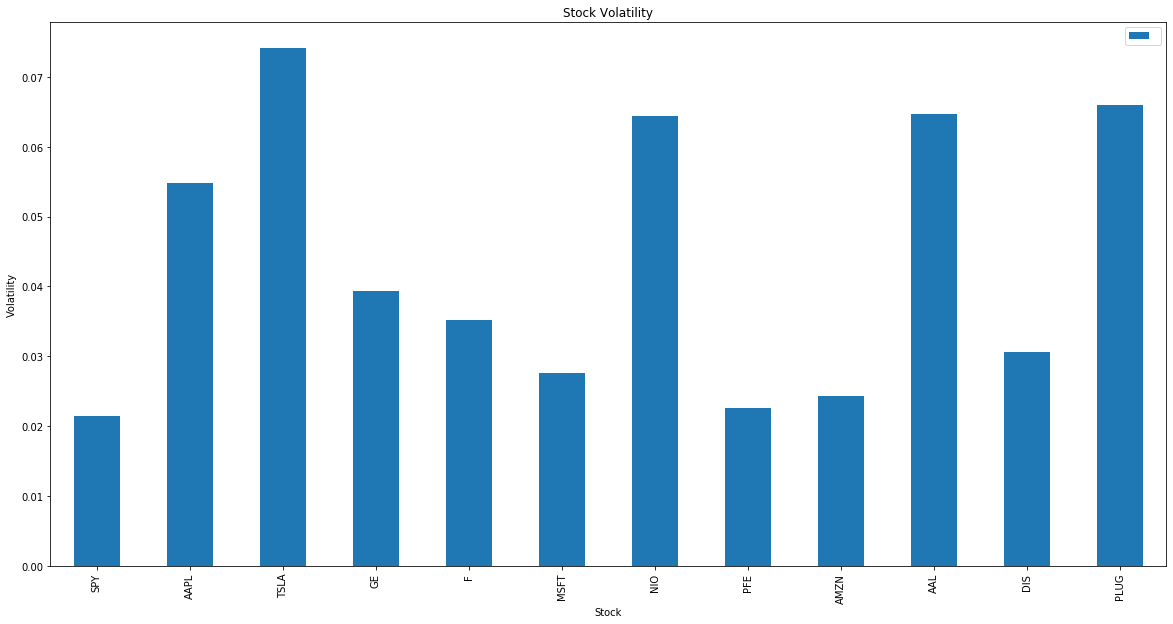

In [140]:
df_vola.plot(kind="bar", figsize=(20,10))
plt.title("Stock Volatility")
plt.xlabel("Stock")
plt.ylabel("Volatility")

In [145]:
import plotly.express as px

In [172]:
df_volaaa = df_vola.rename(columns={"" : "Volatility"})

In [221]:
bar_volatility = px.bar(df_volaaa, range_y= (0,.075),title="Stock Volatility", y="Volatility", labels={"value":"Volatility", "index":"Stock"}, width=(800), height=(600))


In [222]:
bar_volatility

In [229]:
dfline = px.line(df_closing_prices, title="Stock Prices January 2020 - January 2021", labels={"value":"Price", "index":"Date"})
dfline